In [83]:
import requests
import datetime as dt
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Webscraping

In [84]:
# URL de la página de Wikipedia con la lista de empresas del S&P 500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [85]:
# Realizar solicitud GET y obtener el HTML de la página
html = requests.get(url).text

In [86]:
# Utilizar BeautifulSoup para parsear el HTML y encontrar la tabla de empresas
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', {'class': 'wikitable sortable'})

In [87]:
# Crear una lista vacía para almacenar los símbolos de las empresas
symbols = []

In [88]:
# Recorrer las filas de la tabla y extraer el símbolo de cada empresa
for row in table.find_all('tr')[1:]:
    symbol = row.find_all('td')[0].text.strip()
    symbols.append(symbol)

In [89]:
# Utilizar la librería yfinance para obtener los datos de cada empresa
for symbol in symbols:
      # Crear objeto Ticker con el símbolo de la empresa
      ticker = yf.Ticker(symbol)
      
      # Obtener datos históricos de la empresa
      history = ticker.history(period='max')


Got error from yahoo api for ticker BRK.B, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- BRK.B: No timezone found, symbol may be delisted
BF.B: 1d data not available for startTime=-2208994789 and endTime=1681517680. Only 100 years worth of day granularity data are allowed to be fetched per request.


### Trabajaremos con una empresa de cada sector

Materiales: EJEMPLO - Dow Inc. (DOW)
Energía: EJEMPLO - Exxon Mobil Corporation (XOM)
Industriales: EJEMPLO - General Electric Company (GE)
Consumo discrecional: EJEMPLO - Amazon.com, Inc. (AMZN)
Tecnología de la información: EJEMPLO - Apple Inc. (AAPL)
Consumo básico: EJEMPLO - Procter & Gamble Co (PG)
Salud: EJEMPLO - Johnson & Johnson (JNJ)

In [90]:
# Crear objeto Ticker para Dow Inc.
dow = yf.Ticker('DOW')
dow_history = dow.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para Exxon Mobil Corporation
xom = yf.Ticker('XOM')
xom_history = xom.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para General Electric Company
ge = yf.Ticker('GE')
ge_history = ge.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para Amazon.com, Inc.
amzn = yf.Ticker('AMZN')
amzn_history = amzn.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para Procter & Gamble Co
pg = yf.Ticker('PG')
pg_history = pg.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para Johnson & Johnson
jnj = yf.Ticker('JNJ')
jnj_history = jnj.history(start='2000-01-01', end=dt.datetime.now())

# Crear objeto Ticker para Apple Inc.
aapl = yf.Ticker('AAPL')
aapl_history = aapl.history(start='2000-01-01', end=dt.datetime.now())

In [91]:
aapl_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,0.796974,0.854918,0.772751,0.850644,535796800,0.0,0.0
2000-01-04 00:00:00-05:00,0.822621,0.840669,0.768951,0.778926,512377600,0.0,0.0
2000-01-05 00:00:00-05:00,0.788424,0.840194,0.782725,0.790324,778321600,0.0,0.0
2000-01-06 00:00:00-05:00,0.806473,0.813122,0.721930,0.721930,767972800,0.0,0.0
2000-01-07 00:00:00-05:00,0.733330,0.767527,0.725731,0.756128,460734400,0.0,0.0


### Eliminamos las dos ultimas columnas que no sirven

In [108]:
companies = [dow_history, xom_history, ge_history, amzn_history, pg_history, jnj_history, aapl_history]
tickers = ["DOW", "XOM", "GE", "AMZN", "PG", "JNJ", "AAPL", "MSFT"]

In [93]:
# Iterar sobre cada DataFrame y eliminar las columnas "Dividends" y "Stock Splits"
for df in companies:
  df.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)

### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

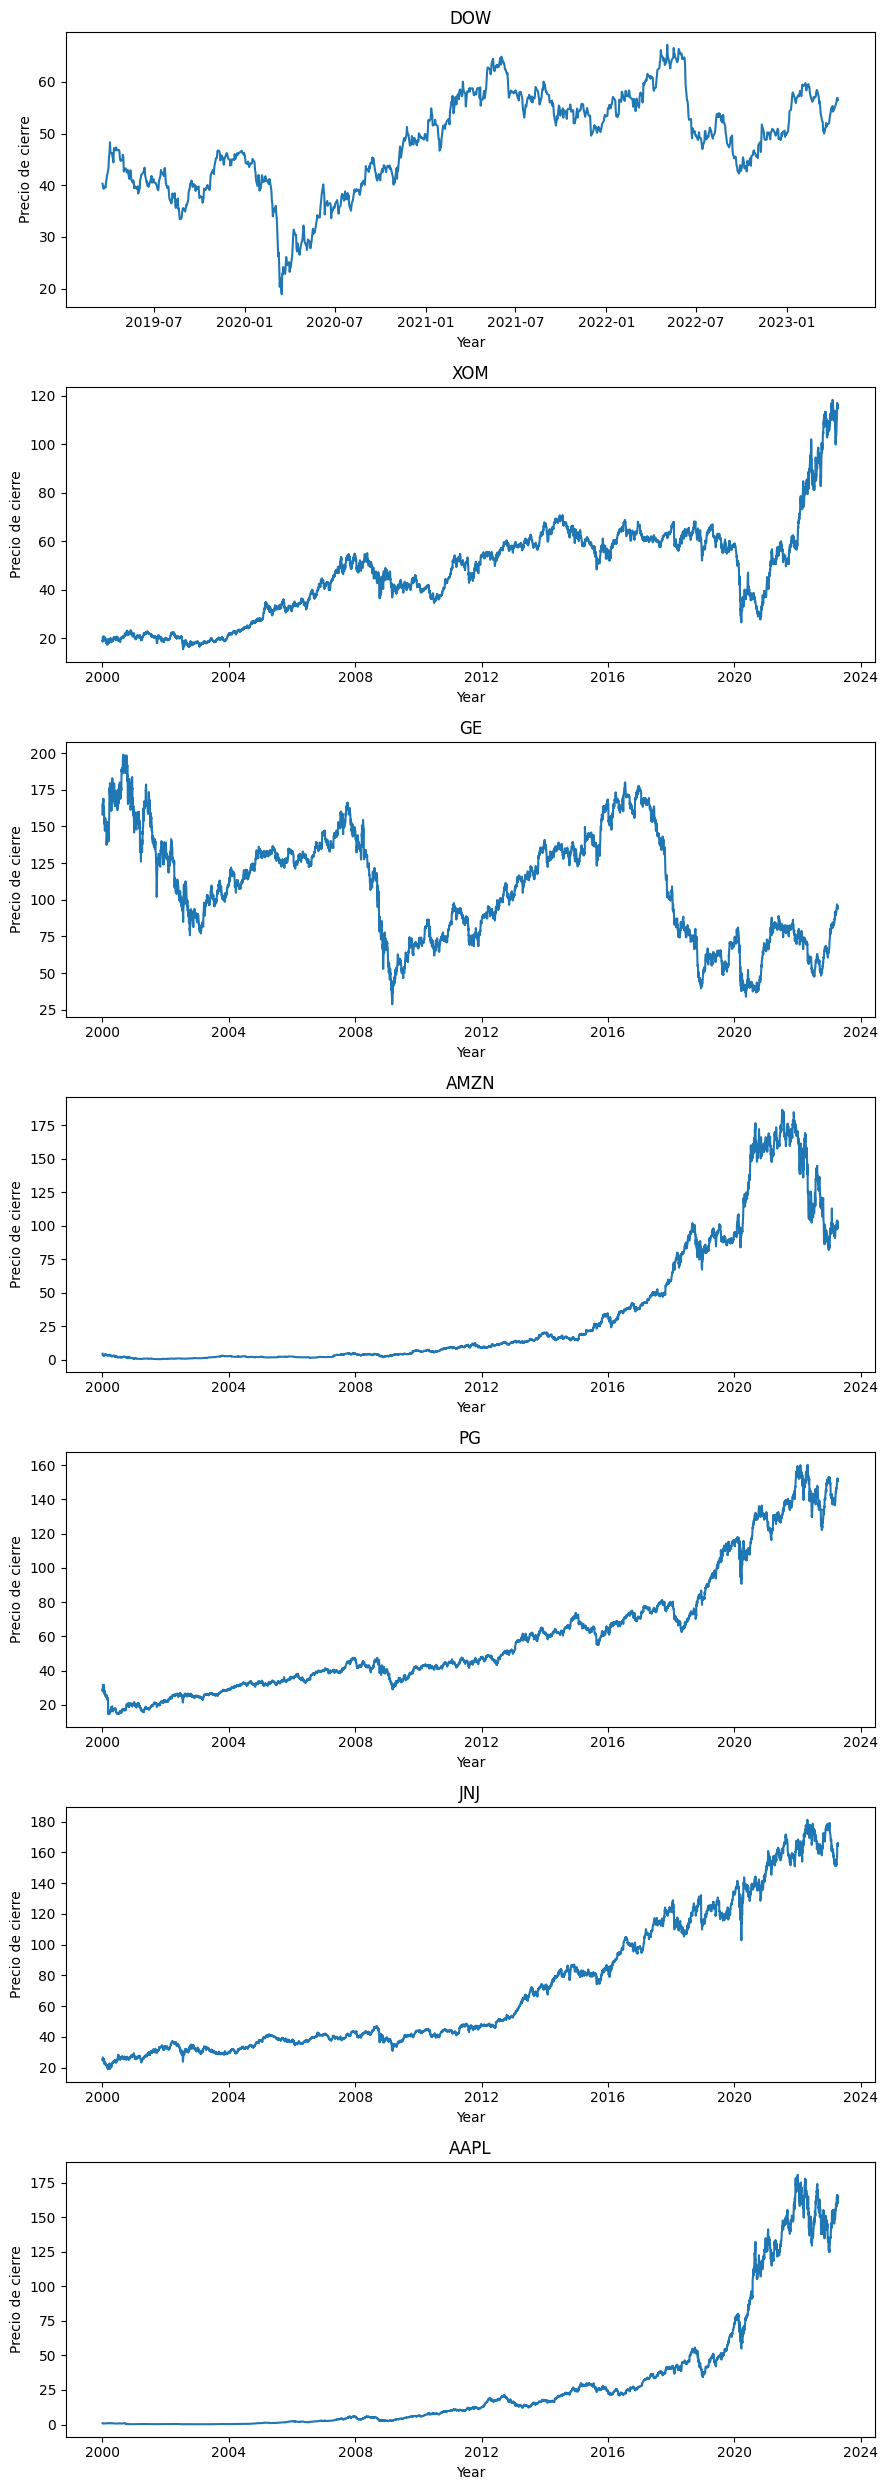

In [94]:
# Precios de cierre a lo largo del tiempo
fig, axs = plt.subplots(len(companies), 1, figsize=(9, 25))

for i, empresa in enumerate(companies):
  axs[i].plot(empresa["Close"])
  axs[i].set_title(tickers[i])
  axs[i].set_xlabel("Year")
  axs[i].set_ylabel("Precio de cierre")

plt.tight_layout()
plt.show

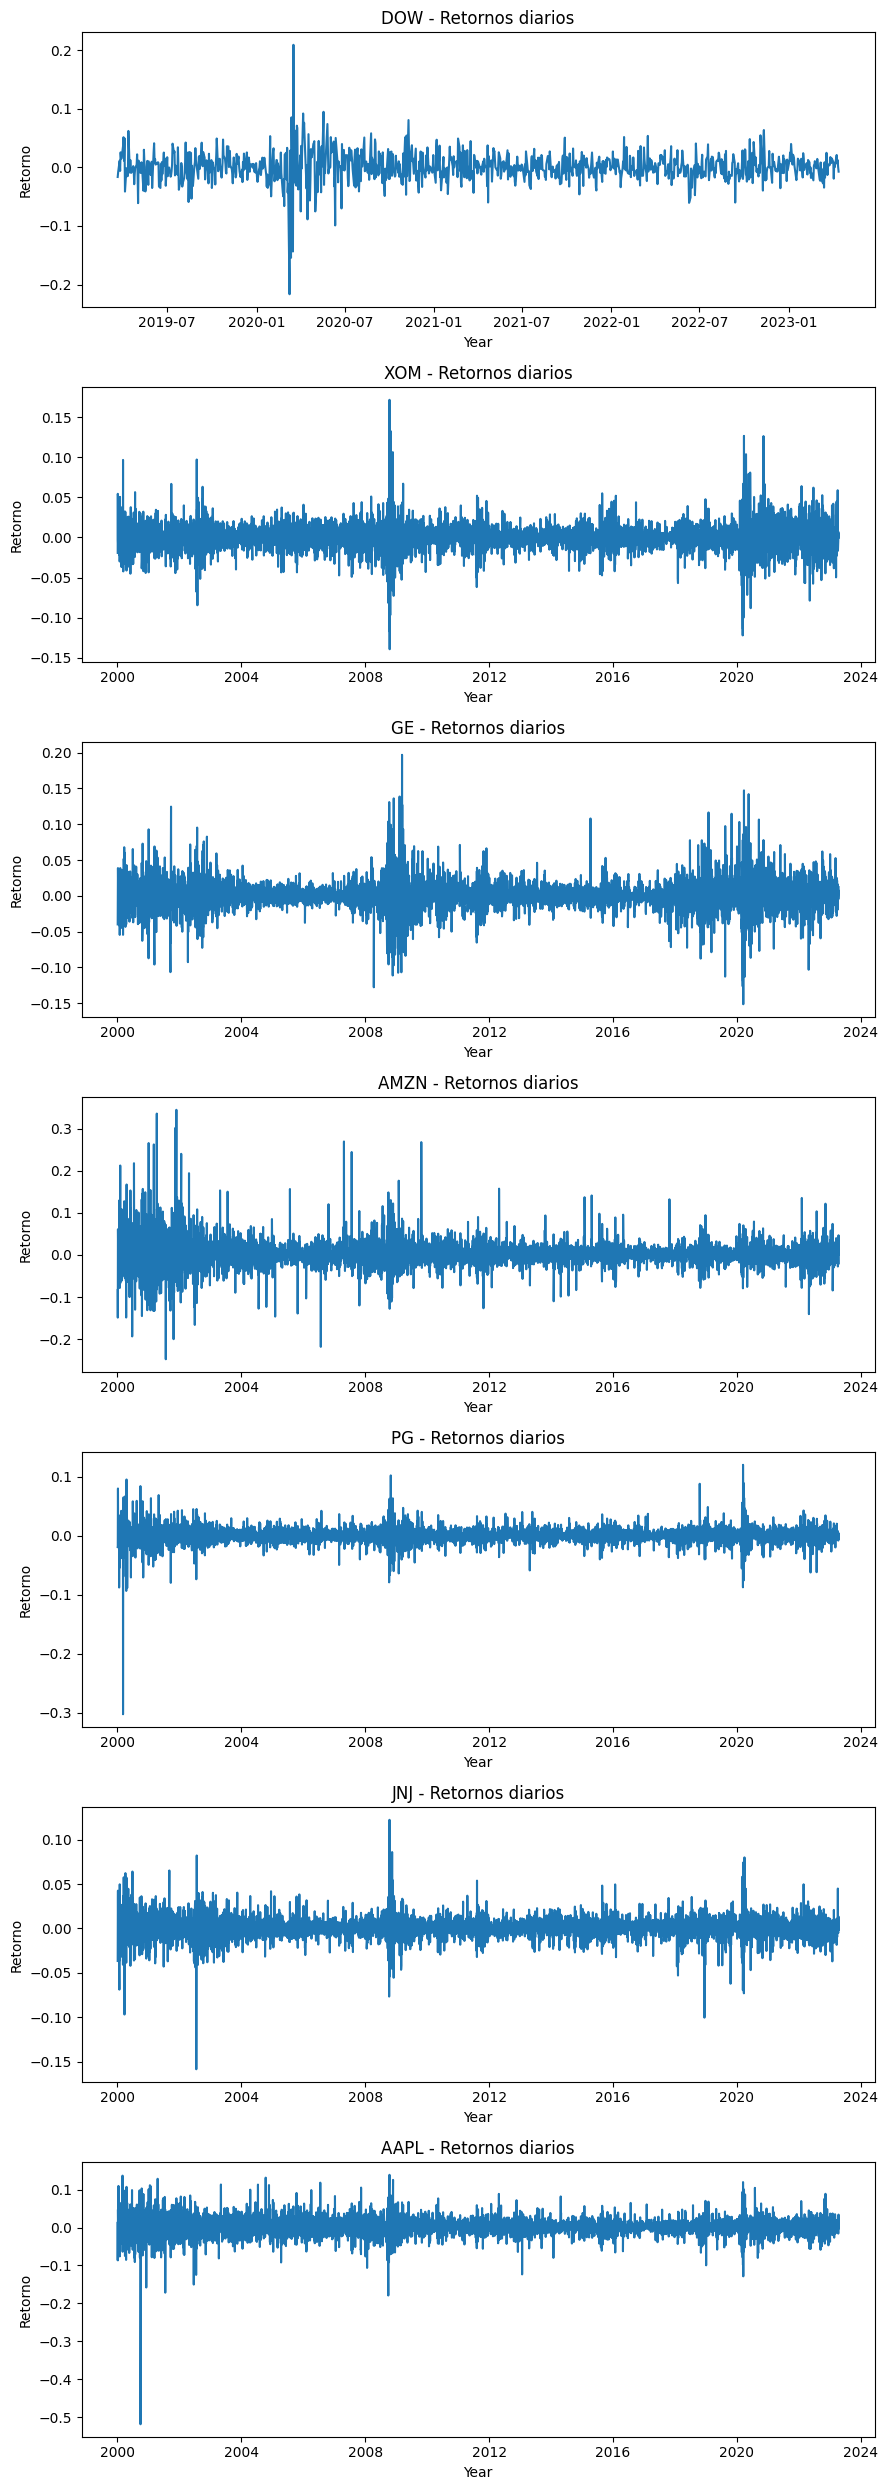

In [95]:
# Retorno diario anual de las empresas
fig, axs = plt.subplots(len(companies), 1, figsize=(9, 25))

for i, empresa in enumerate(companies):
    returns = empresa["Close"].pct_change()
    axs[i].plot(returns)
    axs[i].set_title(tickers[i] + " - Retornos diarios")
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Retorno")

plt.tight_layout()
plt.show()

### Agregamos el retorno diario a los DataFrames

In [96]:
for empresa in companies:
    empresa["Daily Return"] = empresa["Close"].pct_change()

## Calculamos Sharpe Ratio(KPI)

In [104]:
risk_free_rate = 0.02

for i, empresa in enumerate(companies):
    daily_returns = empresa['Daily Return']
    excess_returns = daily_returns - risk_free_rate/252
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    print(f"Sharpe Ratio para {tickers[i]}: {sharpe_ratio:.2f}")

Sharpe Ratio para DOW: 0.36
Sharpe Ratio para XOM: 0.35
Sharpe Ratio para GE: 0.04
Sharpe Ratio para AMZN: 0.48
Sharpe Ratio para PG: 0.35
Sharpe Ratio para JNJ: 0.41
Sharpe Ratio para AAPL: 0.73


### Agregamos a Microsoft(MSFT) y calculamos Sharpe Ratio

In [105]:
msft = yf.Ticker('MSFT')
msft_history = msft.history(start='2000-01-01', end=dt.datetime.now())

In [106]:
# Agregamos el retorno diario a MSFT
msft_history["Daily Return"] = msft_history["Close"].pct_change()

In [107]:
daily_return = msft_history["Daily Return"]
excess_returns = daily_returns - risk_free_rate/252
sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
print(f"Sharpe Ratio MSFT: {sharpe_ratio:.2f}")

Sharpe Ratio MSFT: 0.73


### Calculamos los KPIs

In [ ]:
# Creamos una lista con los DataFrames de las empresas tecnológicas
tech_companies = [amzn_history, aapl_history, msft_history]
tickers = ["AMZN", "AAPL", "MSFT"]

# Creamos un DataFrame vacío para almacenar los resultados
tech_metrics = pd.DataFrame()

# Calculamos los KPIs para cada empresa y los agregamos al DataFrame tech_metrics
for i, company in enumerate(tech_companies):
    symbol = tickers[i]
    market_cap = company.iloc[-1]["Close"] * company.iloc[-1]["Volume"]
    net_income = company["Close"].diff() * company["Volume"]
    total_equity = company["Volume"].cumsum() * company["Close"].cumsum() / company["Close"].cumsum()[-1]
    roe = net_income / total_equity
    eps = net_income / company["Volume"]
    tech_metrics = tech_metrics.append({
        "Symbol": symbol,
        "Market Cap": market_cap,
        "ROE": roe.iloc[-1],
        "EPS": eps.iloc[-1]
    }, ignore_index=True)

print(tech_metrics)

In [116]:
tech_metrics.head()

,Symbol,Market Cap,ROE,EPS
0,AMZN,5.267815e+09,0.000008,0.110001
1,AAPL,8.150999e+09,-0.000007,-0.349991
2,MSFT,6.001472e+09,-0.000255,-3.699982


### Finalizamos exportando los datos

In [109]:
companies = [dow_history, xom_history, ge_history, amzn_history, pg_history, jnj_history, aapl_history, msft_history]

for i in range(len(companies)):
  symbol = tickers[i]
  companies[i].to_csv(f"{symbol}.csv")

In [117]:
tech_metrics.to_csv("tech_metrics.csv")